# Load the Rutgers coldest pixel data

This notebook gives example code for accessing, reading, and plotting Sea Surface Temperature data that Rutgers produces (the coldest pixel product). 

DMCS provides this data via maracoos through a [THREDDS server](https://www.unidata.ucar.edu/software/tds/current/), which is a common way that geophysical datasets and made accessable to the public over the web.

We can use Xarray to directly access data from a THREDDS server and work with it in python. 

This is the THREDDS server we will be using: http://tds.maracoos.org/thredds/ , it's how MARACOOS (Mid-Atlantic Regional Association Coastal Ocean Observing System) distributes their data. Open up the link and you can click around and see the different data products. 

Let's plot the data contained in `Rutgers Coldest-Pixel of Daylight AVHRR Passes/`

If we navigate down we will see that the data is located at a particular url:


http://tds.maracoos.org/thredds/dodsC/Rutgers-Coldest-Pixel-Agg.nc

We will see that we can just use this with the `xr.open_dataset()` function to access the data. Information about xarrays Data Access Protocol is here: http://xarray.pydata.org/en/stable/io.html#opendap

This is a general pattern, you can use this type of system for a lot of public data you might want to access


In [1]:
# import statements

import xarray as xr
import matplotlib.pyplot as plt

%matplotlib inline
# make our default figure size bigger
plt.rcParams['figure.figsize'] = (8,5)

/Users/beaird/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/beaird/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


# load the data 
use the URL of the thredds data as the argument in `xr.open_dataset()`

the url is 
```python
data_url = 'http://tds.maracoos.org/thredds/dodsC/Rutgers-Coldest-Pixel-Agg.nc'
```


In [2]:

data_url = 'http://tds.maracoos.org/thredds/dodsC/Rutgers-Coldest-Pixel-Agg.nc'

ds = xr.open_dataset(data_url)

ds

<xarray.Dataset>
Dimensions:               (lat: 1634, lon: 2636, time: 332, z: 1)
Coordinates:
  * lon                   (lon) float32 -83.25 -83.24 -83.23 ... -56.91 -56.9
  * lat                   (lat) float32 31.0 31.01 31.02 ... 47.31 47.32 47.33
  * z                     (z) float32 0.0
  * time                  (time) datetime64[ns] 2018-10-01T23:59:00 ... 2019-08-28T23:59:00
Data variables:
    platform              |S64 ...
    composite_start_time  (time) timedelta64[ns] ...
    composite_end_time    (time) timedelta64[ns] ...
    included_passes       (time) object ...
    minimum_sun_angle     (time) float32 ...
    mask                  (lat, lon) int8 ...
    sst                   (time, z, lat, lon) float32 ...
    sst_qc_flag           (time, z, lat, lon) float64 ...
Attributes:
    _NCProperties:              version=1|netcdflibversion=4.6.1|hdf5libversi...
    ncei_template_version:      NCEI_NetCDF_Grid_Template_v2.0
    title:                      Daily Daylight-Ho

# `xr.open_dataset()` just reads the metadata

These public datasets can be really huge. So the default behavor is that until you try to calculate something, or plot it, xarray often just download the metadata, but not the data itself. We can ask just for a subset of the big dataset if we only need a little bit, so we dont run out of data. 

Once you do something with the data (plot it, make some calculation) at *that point* xarray actually downloads the data. This lets you slice a small section off (using `.sel()`) before you do caclulations and plots to reduce the size of your download. 

For now, lets plot the while dataset on one day using built-in xarray plotting. Fill in the blanks below:

```python
ds.___.sel( ___='04-01-2019', method=___ ).___()
```




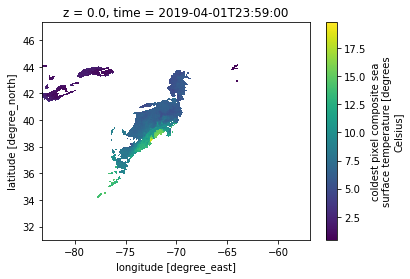

In [3]:
ds.sst.sel(time='04-01-2019', method='nearest' ).plot()

# grab a subset
It's a big datset, and actually it might take a long time to make calculations with it. We can help this a little by just asking for a subset of the data using `.sel( dim=slice() )`

subset the data to get the New Jersey coast of the mid-atlantic bight:

```python
CP_mab_nj = ds.___( ___=___(38,41), ___=slice(-76,-71))
```



In [4]:

CP_mab_nj = ds.sel(lat=slice(38,41), lon=slice(-76,-71))



# plot the subset on a few days

There were some nice clear days in the past two weeks where we saw coastal upwelling, lets plot those days, which were July 21, 2019 and July 25, 2019 (also July 31)

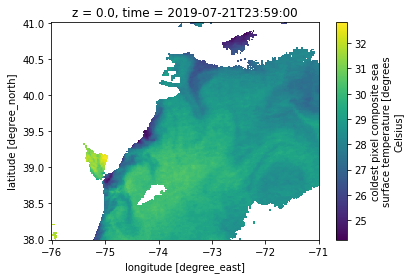

In [8]:
CP_mab_nj.sst.sel(time='07-21-2019', method='nearest' ).plot()
# CP_mab_nj.sst.sel(time='07-25-2019', method='nearest' ).plot()
# CP_mab_nj.sst.sel(time='07-31-2019', method='nearest' ).plot()


# w/ map projection
can use cartopy to get a map projection

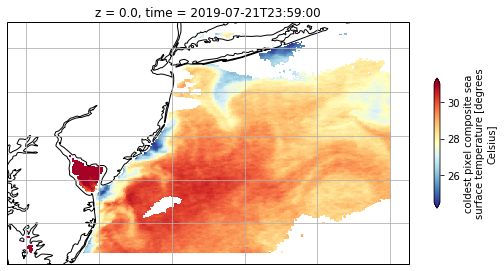

In [17]:
import cartopy.crs as ccrs
import cartopy

fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.gridlines()

CP_mab_nj.sst.sel(time='07-21-2019', method='nearest' ).plot(ax=ax, transform=ccrs.PlateCarree(),
                                                             cmap='RdYlBu_r', vmin=24.5, vmax=31, cbar_kwargs={'shrink': 0.4})